In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import cv2
from skimage.io import imread
import pickle
import cv2
import os
import sklearn
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','surprise']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [4]:
base_path = "../data/train"

In [5]:
IMAGE_SIZE = 32
BATCH_SIZE = 16
VERBOSE = 1

In [6]:
x_train=[]
y_train=[]

In [7]:
for i in class_names:
    folderPath = os.path.join(base_path,i)
    # print(folderPath)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_train.append(img)
        if i == 'angry':
               y_train.append(0)
        elif i == 'disgust':
               y_train.append(1)
        elif i == 'fear':
               y_train.append(2)
        elif i == 'happy':
               y_train.append(3)
        elif i == 'neutral':
               y_train.append(4)
        elif i == 'sad':
               y_train.append(5)
        else:
              y_train.append(6)
        


print('Training dataset Loading complete.')

Training dataset Loading complete.


In [ ]:
# plt.imshow(x_train[645], cmap='binary')
# plt.colorbar();

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train, y_train = sklearn.utils.shuffle(x_train, y_train, random_state=0)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=47, test_size=0.10)

In [74]:
type(y_train)

numpy.ndarray

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25938, 32, 32, 3)
(2883, 32, 32, 3)
(25938,)
(2883,)


In [36]:
# x_train = np.resize(x_train, (25938, 64, 64,))
# x_test = np.resize(x_test, (2883, 64, 64,))
# y_train = np.resize(y_train, (25938,))
# y_test = np.resize(y_train, (2883,))

In [35]:
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(x_train, y_train, random_state=47)
X_test, y_test = shuffle(x_test, y_test, random_state=47)

In [86]:
pd.Series(y_train).value_counts(normalize=True)

3    0.248361
4    0.172951
5    0.170406
2    0.142686
0    0.139217
6    0.111959
1    0.014419
dtype: float64

In [12]:
pd.Series(y_test).value_counts(normalize=True)

3    0.250434
5    0.179674
4    0.172043
2    0.139438
0    0.132501
6    0.104405
1    0.021505
dtype: float64

In [87]:
y_train[0:200]

array([6, 3, 4, 3, 5, 0, 5, 2, 2, 5, 4, 3, 4, 5, 2, 4, 6, 5, 0, 3, 2, 6,
       3, 0, 3, 0, 2, 6, 3, 5, 0, 4, 3, 3, 3, 2, 4, 4, 5, 3, 4, 5, 6, 5,
       5, 4, 3, 5, 5, 4, 4, 3, 4, 4, 2, 4, 4, 4, 0, 2, 0, 6, 4, 3, 5, 6,
       5, 5, 5, 0, 3, 2, 3, 6, 6, 6, 5, 6, 3, 3, 3, 3, 3, 3, 0, 3, 6, 3,
       0, 0, 3, 4, 3, 2, 0, 4, 2, 5, 3, 0, 6, 0, 6, 3, 4, 3, 3, 4, 4, 4,
       3, 2, 0, 0, 3, 3, 3, 5, 5, 3, 1, 3, 4, 0, 2, 3, 4, 4, 0, 2, 3, 4,
       2, 1, 5, 5, 3, 2, 5, 5, 2, 3, 4, 5, 2, 0, 2, 0, 6, 4, 0, 6, 4, 3,
       0, 5, 5, 5, 6, 5, 0, 6, 5, 3, 4, 5, 4, 2, 2, 0, 0, 3, 0, 3, 2, 5,
       3, 0, 3, 0, 5, 4, 3, 0, 3, 3, 3, 2, 0, 5, 2, 3, 3, 3, 0, 2, 0, 2,
       4, 0])

In [13]:
print(x_train.min())
print(x_train.max())

0
255


In [14]:
x_train = x_train/255
x_test = x_test/255

In [90]:
X_train.shape

(25938, 32, 32, 3)

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [17]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
163/163 [==============================] - 32s 190ms/step - loss: 3.8383 - accuracy: 0.2860 - val_loss: 1.6305 - val_accuracy: 0.3556
Epoch 2/20
163/163 [==============================] - 31s 190ms/step - loss: 1.5958 - accuracy: 0.3825 - val_loss: 1.6122 - val_accuracy: 0.3826
Epoch 3/20
163/163 [==============================] - 32s 197ms/step - loss: 1.5136 - accuracy: 0.4204 - val_loss: 1.5510 - val_accuracy: 0.4050
Epoch 4/20
163/163 [==============================] - 32s 194ms/step - loss: 1.4311 - accuracy: 0.4501 - val_loss: 1.5307 - val_accuracy: 0.4125
Epoch 5/20
163/163 [==============================] - 31s 193ms/step - loss: 1.3761 - accuracy: 0.4766 - val_loss: 1.5223 - val_accuracy: 0.4283
Epoch 6/20
163/163 [==============================] - 35s 215ms/step - loss: 1.2994 - accuracy: 0.5042 - val_loss: 1.5290 - val_accuracy: 0.4183
Epoch 7/20
163/163 [==============================] - 33s 203ms/step - loss: 1.2271 - accuracy: 0.5370 - val_loss: 1.5403 - val_ac

KeyboardInterrupt: 

In [102]:
results = model.evaluate(X_test, y_test)
results

91/91 [==============================] - 1s 15ms/step - loss: 2.7694 - accuracy: 0.4232


[2.769381523132324, 0.4231702983379364]

In [20]:
y_pred = model.predict(X_test)


91/91 [==============================] - 1s 16ms/step


In [118]:
# pred_labels = np.argmax(y_pred, axis=1)
# pred_labels

array([4, 0, 6, ..., 6, 3, 3], dtype=int64)

In [21]:
pred_labels = []
for x in range(0, len(y_pred)):
    pred_labels.append(np.argmax(y_pred[x]))
pred_labels

[4,
 6,
 6,
 5,
 4,
 0,
 3,
 5,
 6,
 3,
 3,
 3,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 4,
 2,
 0,
 4,
 4,
 0,
 2,
 2,
 2,
 6,
 4,
 0,
 3,
 0,
 3,
 2,
 4,
 3,
 3,
 6,
 2,
 3,
 4,
 4,
 0,
 4,
 5,
 5,
 4,
 3,
 4,
 6,
 0,
 6,
 3,
 4,
 0,
 5,
 6,
 4,
 0,
 5,
 2,
 4,
 4,
 0,
 3,
 5,
 4,
 4,
 0,
 5,
 4,
 5,
 4,
 2,
 2,
 5,
 6,
 4,
 4,
 6,
 3,
 3,
 0,
 0,
 4,
 6,
 3,
 4,
 0,
 5,
 5,
 3,
 0,
 2,
 4,
 3,
 6,
 5,
 3,
 2,
 5,
 5,
 4,
 3,
 0,
 4,
 5,
 4,
 0,
 5,
 5,
 2,
 4,
 4,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 0,
 6,
 5,
 2,
 4,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 4,
 6,
 3,
 5,
 6,
 0,
 2,
 5,
 0,
 6,
 3,
 5,
 5,
 5,
 5,
 6,
 6,
 4,
 3,
 6,
 0,
 6,
 3,
 4,
 4,
 6,
 0,
 3,
 4,
 3,
 5,
 3,
 6,
 4,
 2,
 3,
 4,
 4,
 0,
 6,
 2,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 6,
 3,
 3,
 2,
 0,
 5,
 3,
 4,
 4,
 4,
 3,
 3,
 0,
 5,
 0,
 3,
 5,
 5,
 3,
 5,
 3,
 0,
 2,
 3,
 6,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 0,
 5,
 3,
 4,
 5,
 6,
 4,
 3,
 3,
 2,
 6,
 5,
 4,
 3,
 0,
 4,
 0,
 3,
 4,
 3,
 5,
 5,
 3,
 4,
 3,
 6,
 6,
 2,
 3,
 3,
 5,
 5,


In [19]:
model.predict(X_test)

91/91 [==============================] - 1s 13ms/step


array([[1.1203549e-02, 2.7694348e-03, 6.4909123e-02, ..., 4.1579297e-01,
        2.6944539e-01, 7.9788704e-04],
       [3.1007853e-01, 6.8741262e-02, 6.3005224e-02, ..., 1.5409604e-01,
        2.1896753e-02, 3.7276408e-01],
       [1.1943939e-02, 1.7846025e-06, 9.2600305e-03, ..., 8.4605964e-04,
        2.5554467e-03, 8.7314755e-01],
       ...,
       [1.9090246e-01, 6.7048747e-04, 6.7826521e-01, ..., 9.2442246e-04,
        8.2879950e-04, 1.2831977e-01],
       [2.6033934e-02, 6.6419423e-05, 1.3725747e-01, ..., 5.9461952e-03,
        9.9717267e-02, 5.0227183e-01],
       [6.2419160e-04, 6.9493151e-05, 4.9484231e-02, ..., 6.1191553e-01,
        1.4100949e-02, 2.0932789e-01]], dtype=float32)

In [106]:
# from sklearn.metrics import multilabel_confusion_matrix

# multilabel_confusion_matrix(y_test, model.predict(X_test).round(0))

In [114]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,4.313504,0.261542,1.699224,0.319005
1,1.642905,0.358410,1.621726,0.367965
2,1.576697,0.383807,1.574476,0.388011
3,1.521535,0.406795,1.560987,0.389360
4,1.474062,0.432916,1.532718,0.406322
5,1.425981,0.454169,1.528219,0.411912
6,1.366029,0.483373,1.536151,0.411912
7,1.304348,0.505398,1.560615,0.419622
8,1.246578,0.531036,1.552117,0.428103
9,1.173988,0.558169,1.584051,0.420586


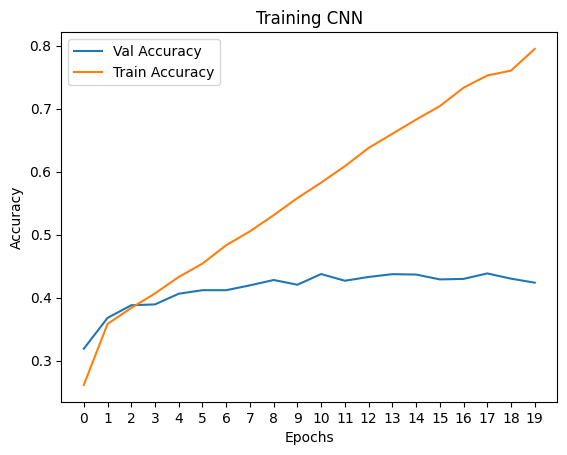

In [115]:
plt.plot(df_hist['val_accuracy'], label="Val Accuracy")
plt.plot(df_hist['accuracy'], label = "Train Accuracy")
plt.title("Training CNN")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.xticks(np.arange(0,20))
plt.legend()

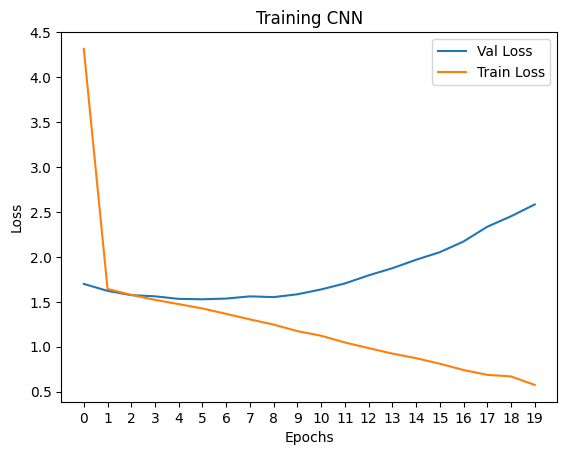

In [116]:
plt.plot(df_hist['val_loss'], label="Val Loss")
plt.plot(df_hist['loss'], label = "Train Loss")
plt.title("Training CNN")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.xticks(np.arange(0,20))
plt.legend()

In [108]:
base_path_test = "../data/test"

In [110]:
base_path_test

'../data/test'

In [127]:
x_test_test = []
y_test_test = []

In [128]:
for j in os.listdir(base_path_test):
    img = cv2.imread(os.path.join(base_path_test,j))
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    x_test_test.append(img)
      


print('Testing dataset Loading complete.')

Testing dataset Loading complete.


In [129]:
x_test_test

[array([[[  1,   1,   1],
         [  1,   1,   1],
         [  4,   4,   4],
         ...,
         [  4,   4,   4],
         [  5,   5,   5],
         [  2,   2,   2]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  5,   5,   5],
         ...,
         [  5,   5,   5],
         [  4,   4,   4],
         [  3,   3,   3]],
 
        [[  1,   1,   1],
         [  3,   3,   3],
         [  5,   5,   5],
         ...,
         [  7,   7,   7],
         [  7,   7,   7],
         [  5,   5,   5]],
 
        ...,
 
        [[  2,   2,   2],
         [  2,   2,   2],
         [  1,   1,   1],
         ...,
         [ 95,  95,  95],
         [ 78,  78,  78],
         [ 75,  75,  75]],
 
        [[ 19,  19,  19],
         [  3,   3,   3],
         [  0,   0,   0],
         ...,
         [ 73,  73,  73],
         [ 65,  65,  65],
         [101, 101, 101]],
 
        [[ 33,  33,  33],
         [ 21,  21,  21],
         [  5,   5,   5],
         ...,
         [ 57,  57,  57],
  

In [23]:
submision = pd.read_csv('C:\\Users\\jamen\\Documents\\TheBridge\\Alumno\\Proyectos\\KaggelParejas\\test_set.csv')

In [ ]:
submision['label'] = y_pred

In [ ]:
submision[]

In [ ]:
pred_labels

In [ ]:
model.predict(x_test_test)

In [24]:
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
y_pred = [emotion_labels[prediction.argmax()] for prediction in pred_labels]

In [ ]:
submission_df = pd.DataFrame({'id_img': submision, 'label': y_pred})

In [ ]:
submission_df.to_csv('submission.csv', index=False)